<a href="https://colab.research.google.com/github/WojciechWielgus/DeepLearning/blob/master/CNN_HelloWorld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Konwolucyjna Sieć Neuronowa - MNIST

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba danych treningowych', X_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba danych treningowych 60000


In [6]:
img_rows, img_cols = 28, 28
if keras.backend.image_data_format() == 'channel_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('input_shape')

input_shape


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [9]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Budowa modelu

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
________________________________________

In [11]:
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 12s 202us/step - loss: 0.1997 - acc: 0.9389 - val_loss: 0.0521 - val_acc: 0.9825
Epoch 2/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0452 - acc: 0.9868 - val_loss: 0.0489 - val_acc: 0.9849
Epoch 3/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0284 - acc: 0.9912 - val_loss: 0.0316 - val_acc: 0.9889
Epoch 4/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0196 - acc: 0.9941 - val_loss: 0.0331 - val_acc: 0.9898
Epoch 5/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0123 - acc: 0.9960 - val_loss: 0.0327 - val_acc: 0.9896
Epoch 6/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0084 - acc: 0.9976 - val_loss: 0.0355 - val_acc: 0.9895
Epoch 7/20
60000/60000 [

In [0]:
def make_accuracy_plot(history):
    """
    Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym
    i walidacyjnym w bibliotece Keras.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['acc'], history.history['val_acc']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Dokładność trenowania', marker='o')
    plt.plot(epochs, val_acc, label='Dokładność walidacji', marker='o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()


def make_loss_plot(history):
    """
    Funkcja zwraca wykres straty (loss) modelu na zbiorze treningowym
    i walidacyjnym w bibliotece Keras.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Strata trenowania', marker='o')
    plt.plot(epochs, val_loss, label='Strata walidacji', marker='o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()

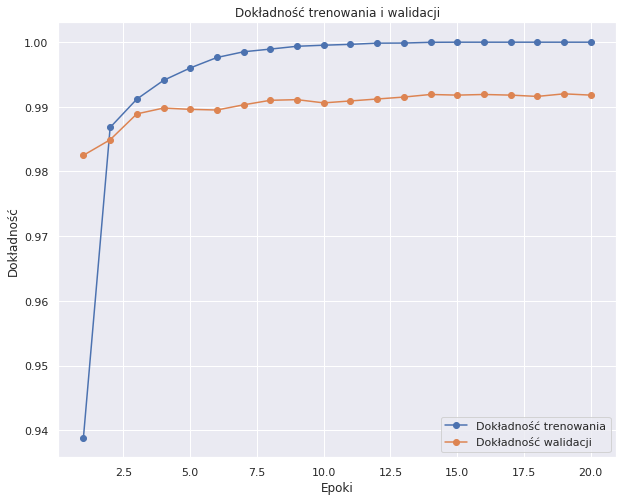

In [15]:
make_accuracy_plot(history)

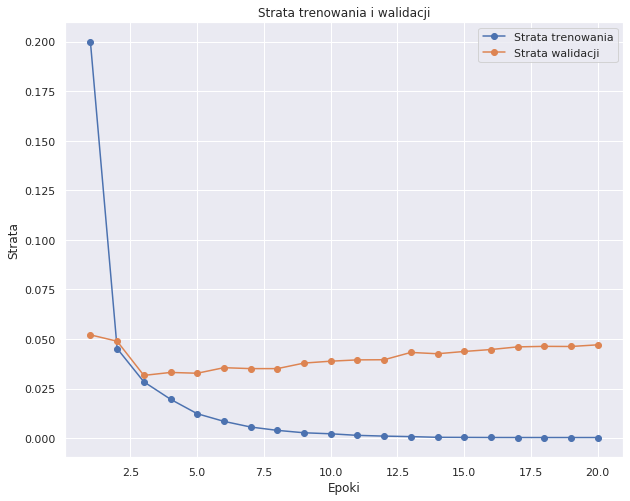

In [16]:
make_loss_plot(history)